# Bay Area, CA - Airbnb Data


### Context

Since its inception in 2008, Airbnb has disrupted the hospitality industry by allowing almost anyone to rent out a spare room and host travelers looking for an overnight stay.

While Airbnb has publicly available data from many locations, **Santa Clara County is of particular interest as it is one of the major counties in the Bay Area and home to many prominent tech companies and startups in the Silicon Valley.**
As such, home prices and cost of living are exceptionally high in this area, as one will see in the data.

### Content

All data is publicly available under the Creative Commons "Public Domain Dedication" license and has been updated as of June 12th, 2020.Provided are metrics that are publicly visible for each listing (e.g. name, description, price, reviews, etc.), but the dataset contains some Airbnb's internal metrics as well (review score accuracy, host acceptance rate, etc.).

### Acknowledgements

Acknowledgments go to Airbnb for their publicly released datasets that are available at this website.

### Inspiration & ideas:

1. Create a price-suggestion model for new Airbnb hosts who might not know the value of their listing.
   - Text mining with statified house price data
2. Can we predict the rating of an Airbnb listing utilizing **NLP** of the description columns?How have Airbnb
3. prices changed over time? Are prices seasonal?
   - Time series analysis?
4. Which areas in the Santa Clara County are most "popular"?
   - Region analysis
5. Which features of an Airbnb listing are important to add to its perceived value?
   - Feature analysis,PCA
   - Correlation analysis


#### Notes:

1.  Selecting the data you need : feature_df, instead of take them all even if you drop some of the missing value columns.
2.  Making binary data in on column, instead of one-hot encoding.
3.  PCA

## Import libraries and data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

In [2]:
data = pd.read_csv('./data/Airbnb_Listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,NaN,NaN,https://a0.muscache.com/im/pictures/529448/3d7...,NaN,7054,https://www.airbnb.com/users/show/7054,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within an hour,100%,98%,t,https://a0.muscache.com/im/users/7054/profile_...,https://a0.muscache.com/im/users/7054/profile_...,Palo Alto,5.0,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,NaN,Palo Alto,CA,94301,"South Bay, CA","Palo Alto, CA",US,United States,37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",NaN,$90.00,$440.00,"$1,428.00",$0.00,$35.00,1,$45.00,2,365,2,2,365,365,2.0,365.0,2 months ago,t,0,0,0,0,2020-05-30,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""PALO ALTO""}",f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,NaN,NaN,https://a0.muscache.com/im/pictures/121321/2c5...,NaN,42458,https://www.airbnb.com/users/show/42458,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,90%,f,https://a0.muscach

In [3]:
data.shape

(7221, 106)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 5.8+ MB


## Data Cleaning


### Clean missing and null values

In [5]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({
    'column_name': data.columns,
    'percent_missing': percent_missing
}).sort_values(by='percent_missing', ascending=False)
missing_value_df

,column_name,percent_missing
neighbourhood_group_cleansed,neighbourhood_group_cleansed,100.0
thumbnail_url,thumbnail_url,100.0
license,license,100.0
xl_picture_url,xl_picture_url,100.0
medium_url,medium_url,100.0
...,...,...
maximum_nights,maximum_nights,0.0
minimum_minimum_nights,minimum_minimum_nights,0.0
maximum_minimum_nights,maximum_minimum_nights,0.0
minimum_maximum_nights,minimum_maximum_nights,0.0


In [6]:
# find missing values and single value columns in data:
del_cols = []

for col in data.columns:
    if data[col].isna().all():
        del_cols.append(col)
    elif data[col].nunique() == 1:
        del_cols.append(col)

In [7]:
del_cols

['scrape_id',
 'experiences_offered',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'neighbourhood_group_cleansed',
 'country_code',
 'country',
 'has_availability',
 'requires_license',
 'license',
 'is_business_travel_ready']

In [8]:
data = data.drop(del_cols, axis=1)

In [9]:
data['id'].isna().sum()

0

In [10]:
# delete url column:
urls = [
    'listing_url', 'picture_url', 'host_url', 'host_thumbnail_url',
    'host_picture_url'
]


In [11]:
data = data.drop(urls, axis=1)

In [12]:
for col in data.columns:
    list_unique = (col, len(data[col].unique()))
    print(list_unique)

('id', 7221)
('last_scraped', 2)
('name', 7078)
('summary', 6052)
('space', 4403)
('description', 6440)
('neighborhood_overview', 3509)
('notes', 2747)
('transit', 3200)
('access', 3378)
('interaction', 3166)
('house_rules', 3718)
('host_id', 3533)
('host_name', 2103)
('host_since', 2085)
('host_location', 242)
('host_about', 2030)
('host_response_time', 5)
('host_response_rate', 44)
('host_acceptance_rate', 78)
('host_is_superhost', 3)
('host_neighbourhood', 145)
('host_listings_count', 62)
('host_total_listings_count', 62)
('host_verifications', 240)
('host_has_profile_pic', 3)
('host_identity_verified', 3)
('street', 37)
('neighbourhood', 37)
('neighbourhood_cleansed', 16)
('city', 35)
('state', 5)
('zipcode', 83)
('market', 5)
('smart_location', 37)
('latitude', 5882)
('longitude', 6357)
('is_location_exact', 2)
('property_type', 28)
('room_type', 4)
('accommodates', 16)
('bathrooms', 16)
('bedrooms', 11)
('beds', 21)
('bed_type', 5)
('amenities', 6396)
('square_feet', 25)
('price'

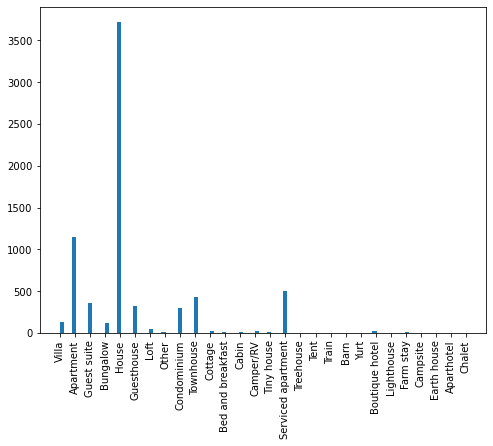

In [13]:
#Visualize proprty_type:

_, ax = plt.subplots(figsize=(8, 6))

ax.hist(data['property_type'], bins=100)

plt.xticks(rotation=90)
plt.show()

In [14]:
data['state'].unique()  # to drop


array(['CA', 'Ca', 'ca', nan, 'California '], dtype=object)

In [15]:
data_null = data.isnull().sum()

In [16]:
data_null.sort_values(ascending=False)

square_feet                                     7192
weekly_price                                    6647
monthly_price                                   6629
notes                                           3529
access                                          3117
transit                                         3085
interaction                                     2968
neighborhood_overview                           2677
host_about                                      2334
house_rules                                     2264
host_response_rate                              1807
host_response_time                              1807
space                                           1707
security_deposit                                1457
review_scores_location                          1370
review_scores_checkin                           1370
review_scores_value                             1370
review_scores_communication                     1369
review_scores_accuracy                        

In [17]:
data = data.drop(['square_feet', 'zipcode', 'state'], axis=1)


### Check the numerical and nominal data seperately


In [18]:
numeric_features = data.select_dtypes(include=['int64', 'float64'])
nominal_features = data.select_dtypes(include=['object'])

In [19]:
numeric_features.head()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,7054,5.0,5.0,37.43972,-122.15672,2,2.0,1.0,1.0,1,2,365,2,2,365,365,2.0,365.0,0,0,0,0,75,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,5,0,5,0,0.57
1,11464,42458,13.0,13.0,37.34342,-121.98829,1,1.0,NaN,1.0,1,14,365,14,14,365,365,14.0,365.0,30,60,90,179,6,1,87.0,10.0,10.0,10.0,9.0,9.0,9.0,12,12,0,0,0.08
2,17884,69023,2.0,2.0,37.38612,-122.07357,2,1.0,1.0,1.0,1,30,180,30,30,180,180,30.0,180.0,29,59,89,179,2,0,90.0,8.0,10.0,10.0,10.0,10.0,10.0,2,2,0,0,0.11
3,21373,7054,5.0,5.0,37.44001,-122.15667,1,2.0,1.0,1.0,1,2,730,2,2,730,730,2.0,730.0,0,0,0,212,264,39,97.0,10.0,10.0,10.0,10.0,10.0,10.0,5,0,5,0,2.17
4,37512,161741,2.0,2.0,37.30598,-121.84036,2,1.0,1.0,1.0,1,1,7,1,1,7,7,1.0,7.0,0,0,28,303,183,0,94.0,9.0,10.0,10.0,10.0,9.0,9.0,2,0,2,0,1.53


In [20]:
numeric_features.columns

Index(['id', 'host_id', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')

In [21]:
(data['maximum_maximum_nights'] == data['minimum_maximum_nights']
 ).value_counts()


True     7178
False      43
dtype: int64

In [22]:
(data['host_listings_count'] == data['host_total_listings_count']
 ).value_counts()


True     7220
False       1
dtype: int64

In [23]:
numeric_features.isna().sum()

id                                                 0
host_id                                            0
host_listings_count                                1
host_total_listings_count                          1
latitude                                           0
longitude                                          0
accommodates                                       0
bathrooms                                          1
bedrooms                                           6
beds                                              68
guests_included                                    0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             0
maximum_minimum_nights                             0
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                             0
maximum_nights_avg_ntm                        

In [24]:
nominal_features.head()

,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,market,smart_location,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within an hour,100%,98%,t,Palo Alto,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,Palo Alto,"South Bay, CA","Palo Alto, CA",t,Villa,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",$90.00,$440.00,"$1,428.00",$0.00,$35.00,$45.00,2 months ago,2020-05-30,2009-08-02,2019-01-12,"{""PALO ALTO""}",f,moderate,f,f
1,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,90%,f,Santa Clara,"['email', 'phone', 'reviews']",t,f,"Santa Clara, CA, United States",Santa Clara,Santa Clara,Santa Clara,"South Bay, CA","Santa Clara, CA",t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$85.00,NaN,"$2,100.00",$700.00,$250.00,$10.00,5 months ago,2020-05-31,2014-06-15,2019-10-11,"{""SANTA CLARA""}",f,moderate,f,t
2,2020-05-31,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...","This is a very quiet family neighborhood, but ...","I cannot accommodate cats, sorry. I can usuall...","The CalTrain station is in walking distance, a...",Private outdoor patio. Shared washer/dryer on ...,I am usually in town. Guests have a private e...,"This is a quiet neighborhood, and the suite sh...",Janet,2010-01-08,"Lynn Haven, Florida, United States","I am a software engineer, recently retired fro...",within a day,100%,50%,f,Palo Alto,"['email', 'phone', 'reviews', 'kba']",t,t,"Mountain View, CA, United States",Mountain View,Mountain View,Mountain View,"South Bay, CA","Mountain View, CA",t,Guest suite,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$65.00,"$1,400.00","$2,800.00","$1,000.00",NaN,$0.00,4 weeks ago,2020-05-31,2018-11-20,2019-04-27,"{""Mountain View"","" CA""}",f,strict_14_with_grace_period,f,f
3,2020-05-30,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,This room is in an ultra convenient locati

In [25]:
nominal_features.columns

Index(['last_scraped', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'market',
       'smart_location', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'calendar_last_scraped', 'first_review', 'last_review',
       'jurisdiction_names', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [26]:
nominal_features.isna().sum()

last_scraped                           0
name                                   1
summary                              299
space                               1707
description                          238
neighborhood_overview               2677
notes                               3529
transit                             3085
access                              3117
interaction                         2968
house_rules                         2264
host_name                              1
host_since                             1
host_location                         23
host_about                          2334
host_response_time                  1807
host_response_rate                  1807
host_acceptance_rate                 714
host_is_superhost                      1
host_neighbourhood                  1181
host_verifications                     0
host_has_profile_pic                   1
host_identity_verified                 1
street                                 0
neighbourhood   

In [27]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [28]:
data['market'].unique()  # to drop


array(['South Bay, CA', 'Monterey Region', 'Other (Domestic)',
       'South Bay CA', nan], dtype=object)

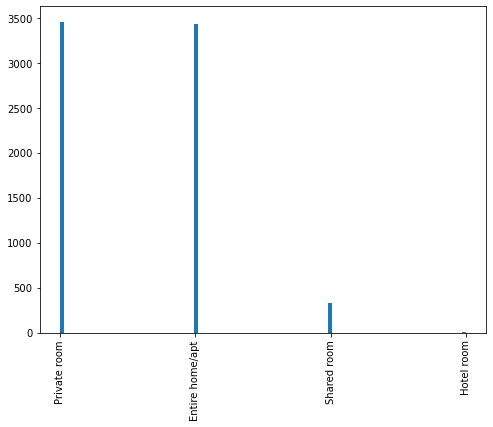

In [29]:
#Visualize room_type:

_, ax = plt.subplots(figsize=(8, 6))

ax.hist(data['room_type'], bins=100)

plt.xticks(rotation=90)
plt.show()

In [30]:
accomo_type = data['accommodates'].unique()
accomo_type.sort()
accomo_type

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

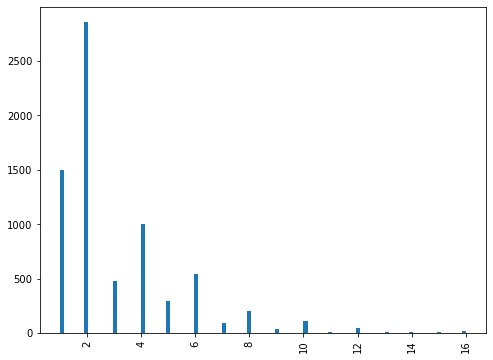

In [31]:
#Visualize accomodates:

_, ax = plt.subplots(figsize=(8, 6))

ax.hist(data['accommodates'], bins=100)

plt.xticks(rotation=90)
plt.show()

In [32]:
data['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [33]:
data['cancellation_policy'].unique()

array(['moderate', 'strict_14_with_grace_period', 'flexible',
       'super_strict_60'], dtype=object)

### Clean the city column


In [34]:
data['city'].unique()

array(['Palo Alto', 'Santa Clara', 'Mountain View', 'San Jose',
       'Cupertino', 'Sunnyvale', 'Campbell', 'Milpitas', 'Saratoga',
       'Morgan Hill', 'Los Altos', 'Los Gatos', 'Menlo Park',
       'Los Altos Hills', 'Monte Sereno', 'Hollister', 'Gilroy',
       'San Jose ', 'San Martin', 'Stanford', 'Santa Clara County',
       'Sunnyvale ', 'Palo Alto ', 'Milpitas ', 'Los Gatos ', 'san jose',
       'Mountain View ', 'Danville ', nan, 'Campbell ', '洛斯阿尔托斯',
       'santa clara', 'Fremont', '圣何塞', 'Watsonville'], dtype=object)

In [35]:
data['city'] = data['city'].str.replace('圣何塞', 'San Jose')
data['city'] = data['city'].str.replace('san jose', 'San Jose')
data['city'] = data['city'].str.replace('洛斯阿尔托斯', 'Los Altos')
data['city'] = data['city'].str.replace('santa clara', 'Santa Clara')
data['city'] = data['city'].str.replace('Santa Clara County', 'Santa Clara')
data['city'].str.strip()

0           Palo Alto
1         Santa Clara
2       Mountain View
3           Palo Alto
4            San Jose
            ...      
7216         San Jose
7217      Santa Clara
7218        Sunnyvale
7219         San Jose
7220         San Jose
Name: city, Length: 7221, dtype: object

In [36]:
data['city'].unique()

array(['Palo Alto', 'Santa Clara', 'Mountain View', 'San Jose',
       'Cupertino', 'Sunnyvale', 'Campbell', 'Milpitas', 'Saratoga',
       'Morgan Hill', 'Los Altos', 'Los Gatos', 'Menlo Park',
       'Los Altos Hills', 'Monte Sereno', 'Hollister', 'Gilroy',
       'San Jose ', 'San Martin', 'Stanford', 'Sunnyvale ', 'Palo Alto ',
       'Milpitas ', 'Los Gatos ', 'Mountain View ', 'Danville ', nan,
       'Campbell ', 'Fremont', 'Watsonville'], dtype=object)

In [37]:
data['city'].value_counts(ascending=False)

San Jose           3031
Palo Alto           788
Sunnyvale           764
Santa Clara         715
Mountain View       665
Cupertino           335
Milpitas            296
Los Gatos           133
Campbell            128
Los Altos            90
Saratoga             70
Morgan Hill          63
Los Altos Hills      53
Gilroy               32
Monte Sereno         16
San Martin           15
Menlo Park            4
Palo Alto             4
San Jose              3
Stanford              3
Fremont               3
Hollister             2
Sunnyvale             1
Milpitas              1
Los Gatos             1
Mountain View         1
Danville              1
Campbell              1
Watsonville           1
Name: city, dtype: int64

### Find the unique values in each column


In [38]:
(data['host_is_superhost'] == data['host_identity_verified']).value_counts()

True     4229
False    2992
dtype: int64

In [39]:
(data['require_guest_profile_picture'] ==
 data['require_guest_phone_verification']).value_counts()


True     7083
False     138
dtype: int64

In [40]:
data['host_response_time'].value_counts()

within an hour        3993
within a few hours     862
within a day           411
a few days or more     148
Name: host_response_time, dtype: int64

Drop the 'require_guest_profile_picture' later


### Clean the duplicated columns,drop the following columns

based on the analysis abvoe, we can drop the following columns:


In [41]:
data.drop([
    'host_id', 'last_scraped', 'market', 'require_guest_profile_picture',
    'minimum_maximum_nights', 'host_total_listings_count',
    'calendar_last_scraped'
],
          axis=1,
          inplace=True)

### Create dummy variables for categorical features

In [42]:
for col, n in zip(data.columns, data.nunique()):
    if n < 10 and n > 1:
        print(col, n)


host_response_time 4
host_is_superhost 2
host_has_profile_pic 2
host_identity_verified 2
is_location_exact 2
room_type 4
bed_type 5
review_scores_accuracy 8
review_scores_cleanliness 8
review_scores_checkin 8
review_scores_communication 8
review_scores_location 7
review_scores_value 8
instant_bookable 2
cancellation_policy 4
require_guest_phone_verification 2


In [43]:
binary_cols = []
triple_cols = []
quater_cols = []

for col in data.columns:
    if data[col].nunique() == 2:
        binary_cols.append(col)
    elif data[col].nunique() ==3:
        triple_cols.append(col)
    elif data[col].nunique() == 4:
        quater_cols.append(col)
    
        

print(binary_cols)
print(triple_cols)
print(quater_cols)

['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_phone_verification']
[]
['host_response_time', 'room_type', 'cancellation_policy']


In [44]:
for col in quater_cols:
    print(data[col].value_counts(ascending=False))


within an hour        3993
within a few hours     862
within a day           411
a few days or more     148
Name: host_response_time, dtype: int64
Private room       3454
Entire home/apt    3431
Shared room         334
Hotel room            2
Name: room_type, dtype: int64
flexible                       2817
moderate                       2278
strict_14_with_grace_period    2125
super_strict_60                   1
Name: cancellation_policy, dtype: int64


In [45]:
# for col in quater_cols:
#     counts = pd.DataFrame(data[col].value_counts())
#     counts.columns = [col]
#     counts.reset_index(inplace=True)
#     # counts.columns = ['value', col]
#     # counts['value'] = counts['value'].astype(int)
#     # counts.sort_values(by='value', ascending=False, inplace=True)
#     # counts.reset_index(inplace=True, drop=True)
#     counts.head()

In [46]:
# bed_type 5
data['bed_type'].value_counts(ascending=False) # to drop

Real Bed         7156
Futon              30
Couch              14
Airbed             11
Pull-out Sofa      10
Name: bed_type, dtype: int64

In [47]:
# data = pd.get_dummies(data,
#                       columns=[
#                           'host_is_superhost', 'host_identity_verified',
#                           'instant_bookable', 'cancellation_policy',
#                           'room_type'
#                       ],
#                       prefix=[
#                           'Superhost', 'Host verified', 'Instantbook',
#                           'Cancellation', 'Room type'
#                       ],
#                       dtype='int64')


#### `Feature_df`

In [48]:
feature_df = data[['id', 'name']]
feature_df.head()

,id,name
0,4952,Butterfly Inn - Graceful Living !
1,11464,Deluxe Private Studio-custom int.
2,17884,Silicon Valley Suite
3,21373,Bonsai Garden Inn in Professorville
4,37512,Private room - Parking 3 carport


In [49]:
feature_df['host_response_in_1_hour'] = data['host_response_time'].apply(
    lambda x: 1 if x == 'within an hour' else 0)
feature_df['host_response_rate100'] = data['host_response_rate'].apply(
    lambda x: int(x == '100%') if isinstance(x, str) else 0)
feature_df['host_acceptance_rate100'] = data['host_acceptance_rate'].apply(
    lambda x: int(x == '100%') if isinstance(x, str) else 0)
feature_df['host_is_superhost'] = data['host_is_superhost'].apply(
    lambda x: int(x == 't') if isinstance(x, str) else 0)
feature_df['host_identity_verified'] = data['host_identity_verified'].apply(
    lambda x: int(x == 't') if isinstance(x, str) else 0)
feature_df['room_type_private_room'] = data['room_type'].apply(
    lambda x: int(x == 'Private room') if isinstance(x, str) else 0)
feature_df['room_type_entire_home'] = data['room_type'].apply(
    lambda x: int(x == 'Entire home/apt') if isinstance(x, str) else 0)
feature_df['charge_extra_people_fee'] = data['extra_people'].apply(
    lambda x: int(x != '$0.00') if isinstance(x, str) else 0)

feature_df['cancellation_policy_flexible'] = data['cancellation_policy'].apply(
    lambda x: int(x == 'flexible') if isinstance(x, str) else 0)
feature_df['cancellation_policy_moderate'] = data['cancellation_policy'].apply(
    lambda x: int(x == 'moderate') if isinstance(x, str) else 0)
feature_df['cancellation_policy_strict'] = data['cancellation_policy'].apply(
    lambda x: int(x == 'strict_14_with_grace_period')
    if isinstance(x, str) else 0)
feature_df['instant_bookable'] = data['instant_bookable'].apply(
    lambda x: int(x == 't') if isinstance(x, str) else 0)

/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_6934/3022914198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['host_response_in_1_hour'] = data['host_response_time'].apply(
/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_6934/3022914198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['host_response_rate100'] = data['host_response_rate'].apply(
/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_6934/3022914198.py:5: SettingWithCopyWarning: 
A valu

In [50]:
feature_df.head(20)

,id,name,host_response_in_1_hour,host_response_rate100,host_acceptance_rate100,host_is_superhost,host_identity_verified,room_type_private_room,room_type_entire_home,charge_extra_people_fee,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,instant_bookable
0,4952,Butterfly Inn - Graceful Living !,1,1,0,1,0,1,0,1,0,1,0,0
1,11464,Deluxe Private Studio-custom int.,1,1,0,0,0,0,1,1,0,1,0,0
2,17884,Silicon Valley Suite,0,1,0,0,1,0,1,0,0,0,1,0
3,21373,Bonsai Garden Inn in Professorville,1,1,0,1,0,1,0,1,0,1,0,0
4,37512,Private room - Parking 3 carport,0,1,1,1,1,1,0,0,0,1,0,0
5,40560,MOST COMFORTABLE BED EVER,1,1,0,1,1,1,0,0,0,1,0,0
6,44648,Charming room in West San Jose!!,1,0,0,0,1,1,0,1,0,1,0,0
7,45444,MOST COMFORTABLE QUEEN BED EVER,1,1,0,1,1,1,0,1,0,1,0,0
8,52786,Cozy Room in A Quiet Community,0,1,1,1,1,1,0,0,0,1,0,0
9,62799,Zen Office and Sofa in Palo Alto,1,1,0,1,0,1,0,1,0,1,0,0


### Transfer the unit of currency to float


In [51]:
price_list = [
    'weekly_price',
    'monthly_price',
    'price',
    'security_deposit',
    'cleaning_fee',
    'extra_people',
]

In [52]:
for p in price_list:
    print(p, data[p].isna().sum())


weekly_price 6647
monthly_price 6629
price 0
security_deposit 1457
cleaning_fee 800
extra_people 0


In [53]:
for p in price_list:
    data[p].fillna('$0.00', inplace=True)
    data[p] = data[p].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_6934/1242419390.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[p] = data[p].str.replace('$', '').str.replace(',', '').astype(float)


In [54]:
data[price_list].isna().sum()

weekly_price        0
monthly_price       0
price               0
security_deposit    0
cleaning_fee        0
extra_people        0
dtype: int64

In [55]:
data[price_list].head(3)

,weekly_price,monthly_price,price,security_deposit,cleaning_fee,extra_people
0,440.0,1428.0,90.0,0.0,35.0,45.0
1,0.0,2100.0,85.0,700.0,250.0,10.0
2,1400.0,2800.0,65.0,1000.0,0.0,0.0


#### `data.groupby('host_response_time')['price'].value_counts(bins=6).to_frame()`

In [56]:
data['price'].value_counts(bins=10).to_frame()

,price
"(0.009000000000000001, 1009.0]",7141
"(1009.0, 2008.0]",53
"(2008.0, 3007.0]",16
"(9001.0, 10000.0]",5
"(3007.0, 4006.0]",4
"(4006.0, 5005.0]",1
"(5005.0, 6004.0]",1
"(6004.0, 7003.0]",0
"(7003.0, 8002.0]",0
"(8002.0, 9001.0]",0


In [57]:
data.groupby('host_response_time')['price'].value_counts(bins=6).to_frame()

price
host_response_time                                      
a few days or more (26.528, 440.833]                 138
                   (852.667, 1264.5]                   5
                   (440.833, 852.667]                  2
                   (2088.167, 2500.0]                  2
                   (1676.333, 2088.167]                1
                   (1264.5, 1676.333]                  0
within a day       (16.019, 683.333]                 400
                   (683.333, 1346.667]                 6
                   (1346.667, 2010.0]                  3
                   (3336.667, 4000.0]                  2
                   (2010.0, 2673.333]                  0
                   (2673.333, 3336.667]                0
within a few hours (7.010999999999999, 508.0]        840
                   (508.0, 1006.0]                    13
                   (1006.0, 1504.0]                    5
                   (1504.0, 2002.0]                    2
                   (2002.0, 2500.0]                    1
                   (2500.0, 2998.0]                    1
within an hour     (0.009000000000000001, 1675.0]   3981
                   (1675.0, 3340.0]                    7
                   (8335.0, 10000.0]                   5
                   (3340.0, 5005.0]                    0
                   (5005.0, 6670.0]                    0
                   (6670.0, 8335.0]                    0

In [58]:
data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within an hour,100%,98%,t,Palo Alto,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,Palo Alto,"Palo Alto, CA",37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",90.0,440.0,1428.0,0.0,35.0,1,45.0,2,365,2,2,365,2.0,365.0,2 months ago,0,0,0,0,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,"{""PALO ALTO""}",f,moderate,f,5,0,5,0,0.57
1,11464,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,90%,f,Santa Clara,13.0,"['email', 'phone', 'reviews']",t,f,"Santa Clara, CA, United States",Santa Clara,Santa Clara,Santa Clara,"Santa Clara, CA",37.34342,-121.98829,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",85.0,0.0,2100.0,700.0,250.0,1,10.0,14,365,14,14,365,14.0,365.0,5 months ago,30,60,90,179,6,1,2014-06-15,2019-10-11,87.0,10.0,10.0,10.0,9.0,9.0,9.0,"{""SANTA CLARA""}",f,moderate,t,12,12,0,0,0.08
2,17884,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...","This is a very quiet family neighborhood, but ...","I cannot accommodate cats, sorry. I can usuall...","The CalTrain station is in walking distance, a...",Private outdoor patio. Shared washer/dryer on ...,I am usually in town. Guests have a private e...,"This is a quiet neighborhood, and the suite sh...",Janet,2010-01-08,"L

### Eva percent_missing

In [59]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({
    'column_name': data.columns,
    'percent_missing': percent_missing
}).sort_values(by='percent_missing', ascending=False)

missing_value_df

,column_name,percent_missing
notes,notes,48.871347
access,access,43.165767
transit,transit,42.722615
interaction,interaction,41.102340
neighborhood_overview,neighborhood_overview,37.072428
host_about,host_about,32.322393
house_rules,house_rules,31.352998
host_response_rate,host_response_rate,25.024235
host_response_time,host_response_time,25.024235
space,space,23.639385


In [60]:
numeric_features = data.select_dtypes(
    include=['int64', 'float64', 'float32', 'int32'])
nominal_features = data.select_dtypes(include=['object'])

In [61]:
numeric_features.head()

,id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,5.0,37.43972,-122.15672,2,2.0,1.0,1.0,90.0,440.0,1428.0,0.0,35.0,1,45.0,2,365,2,2,365,2.0,365.0,0,0,0,0,75,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,5,0,5,0,0.57
1,11464,13.0,37.34342,-121.98829,1,1.0,NaN,1.0,85.0,0.0,2100.0,700.0,250.0,1,10.0,14,365,14,14,365,14.0,365.0,30,60,90,179,6,1,87.0,10.0,10.0,10.0,9.0,9.0,9.0,12,12,0,0,0.08
2,17884,2.0,37.38612,-122.07357,2,1.0,1.0,1.0,65.0,1400.0,2800.0,1000.0,0.0,1,0.0,30,180,30,30,180,30.0,180.0,29,59,89,179,2,0,90.0,8.0,10.0,10.0,10.0,10.0,10.0,2,2,0,0,0.11
3,21373,5.0,37.44001,-122.15667,1,2.0,1.0,1.0,99.0,600.0,2000.0,0.0,35.0,1,50.0,2,730,2,2,730,2.0,730.0,0,0,0,212,264,39,97.0,10.0,10.0,10.0,10.0,10.0,10.0,5,0,5,0,2.17
4,37512,2.0,37.30598,-121.84036,2,1.0,1.0,1.0,52.0,393.0,1386.0,0.0,0.0,1,0.0,1,7,1,1,7,1.0,7.0,0,0,28,303,183,0,94.0,9.0,10.0,10.0,10.0,9.0,9.0,2,0,2,0,1.53


In [62]:
nominal_features.head()

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,smart_location,is_location_exact,property_type,room_type,bed_type,amenities,calendar_updated,first_review,last_review,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_phone_verification
0,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within an hour,100%,98%,t,Palo Alto,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,Palo Alto,"Palo Alto, CA",t,Villa,Private room,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",2 months ago,2009-08-02,2019-01-12,"{""PALO ALTO""}",f,moderate,f
1,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,within an hour,100%,90%,f,Santa Clara,"['email', 'phone', 'reviews']",t,f,"Santa Clara, CA, United States",Santa Clara,Santa Clara,Santa Clara,"Santa Clara, CA",t,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",5 months ago,2014-06-15,2019-10-11,"{""SANTA CLARA""}",f,moderate,t
2,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...","This is a very quiet family neighborhood, but ...","I cannot accommodate cats, sorry. I can usuall...","The CalTrain station is in walking distance, a...",Private outdoor patio. Shared washer/dryer on ...,I am usually in town. Guests have a private e...,"This is a quiet neighborhood, and the suite sh...",Janet,2010-01-08,"Lynn Haven, Florida, United States","I am a software engineer, recently retired fro...",within a day,100%,50%,f,Palo Alto,"['email', 'phone', 'reviews', 'kba']",t,t,"Mountain View, CA, United States",Mountain View,Mountain View,Mountain View,"Mountain View, CA",t,Guest suite,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",4 weeks ago,2018-11-20,2019-04-27,"{""Mountain View"","" CA""}",f,strict_14_with_grace_period,f
3,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,This room is in an ultra convenient location i...,The family room has a flat panel tv and desk f...,The Stanford Shopping Center is 20 minutes wal...,"Kitchen, Laundry, Garden, Family Room with TV,...",We will see you everyday as we cook meals in t...,No shoes in the house beyond hall or laundry. ...,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",within an hour,100%,98%,t,Palo Alto,"['email', 'phone',

####  `value_counts(normalize=True).loc[lambda x: x > 0.2]` for categorical features analysis

In [63]:

cat_features = data.select_dtypes(include=['object']).columns
cat_features

Index(['name', 'summary', 'space', 'description', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'smart_location', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities',
       'calendar_updated', 'first_review', 'last_review', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_phone_verification'],
      dtype='object')

In [64]:
cat_cols = []

for col in cat_features:
    list_unique = (col, len(data[col].unique()))
    print(col)
    print(data[col].value_counts(normalize=True).loc[lambda x: x > 0.2])
    cat_cols.append(list_unique)

name
Series([], Name: name, dtype: float64)
summary
Series([], Name: summary, dtype: float64)
space
Series([], Name: space, dtype: float64)
description
Series([], Name: description, dtype: float64)
neighborhood_overview
Series([], Name: neighborhood_overview, dtype: float64)
notes
Series([], Name: notes, dtype: float64)
transit
Series([], Name: transit, dtype: float64)
access
Series([], Name: access, dtype: float64)
interaction
Series([], Name: interaction, dtype: float64)
house_rules
Series([], Name: house_rules, dtype: float64)
host_name
Series([], Name: host_name, dtype: float64)
host_since
Series([], Name: host_since, dtype: float64)
host_location
San Jose, California, United States    0.268964
Name: host_location, dtype: float64
host_about
Series([], Name: host_about, dtype: float64)
host_response_time
within an hour    0.737532
Name: host_response_time, dtype: float64
host_response_rate
100%    0.810676
Name: host_response_rate, dtype: float64
host_acceptance_rate
100%    0.34086

In [65]:
# just try
data['city'].value_counts(normalize=True).loc[lambda x: x > 0.1]

San Jose     0.419806
Palo Alto    0.109141
Sunnyvale    0.105817
Name: city, dtype: float64

### Amenities hot words analysis


In [66]:
from collections import Counter

results = Counter()

In [67]:
amenities = data['amenities']

In [68]:
amenities.str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update).head(3)

0    None
1    None
2    None
Name: amenities, dtype: object

In [69]:
# results

In [70]:
sub_df = pd.DataFrame(results.most_common(50), columns=['amenities', 'count'])

In [71]:
sub_df['ratio'] = round(sub_df['count'] / len(amenities), 4)


In [72]:
sub_df.sort_values(by=['count'], ascending=False)

,amenities,count,ratio
0,Wifi,7071,0.9792
1,Essentials,6904,0.9561
2,Heating,6824,0.9450
3,Smoke alarm,6794,0.9409
4,Hangers,6480,0.8974
5,Shampoo,6271,0.8684
6,Carbon monoxide alarm,6178,0.8556
7,Laptop-friendly workspace,5998,0.8306
8,Hair dryer,5997,0.8305
9,Kitchen,5890,0.8157


### Location visualization:


In [73]:
data['latitude'].describe()

count    7221.000000
mean       37.352285
std         0.064819
min        36.965600
25%        37.319770
50%        37.358260
75%        37.398250
max        37.462980
Name: latitude, dtype: float64

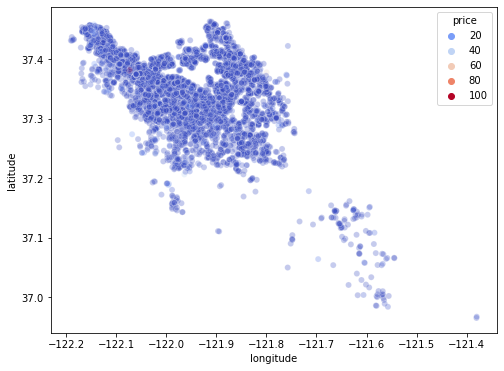

In [74]:
_, ax = plt.subplots(figsize=(8, 6))

g = sns.scatterplot(x=data['longitude'],
                    y=data['latitude'],
                    data=data,
                    ax=ax,
                    alpha=0.3,
                    hue=data['price']/100,
                    palette='coolwarm')

plt.show()

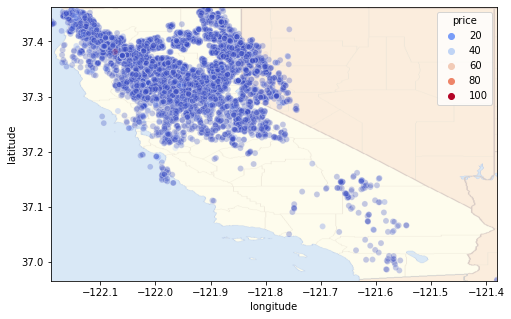

In [75]:
# Now intro Cali map jpeg
import matplotlib.image as mpimg

california_img = mpimg.imread("./california.png")

_, ax = plt.subplots(figsize=(8, 6))

sns.set_context(font_scale=2)

g = sns.scatterplot(x=data['longitude'],
                    y=data['latitude'],
                    data=data,
                    ax=ax,
                    alpha=0.3,
                    hue=data['price']/100,
                    palette='coolwarm')

# Now for cal map:
ax.imshow(
    california_img,
    alpha=0.4,
    extent=[
        data['longitude'].min(), data['longitude'].max(),
        data['latitude'].min(), data['latitude'].max()
    ],
    cmap=plt.get_cmap("jet"),
)

plt.show()


In [76]:
data.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis=1, inplace=True)

### Corelation Matrix

In [77]:
df_corr = data._get_numeric_data().astype(float).corr()

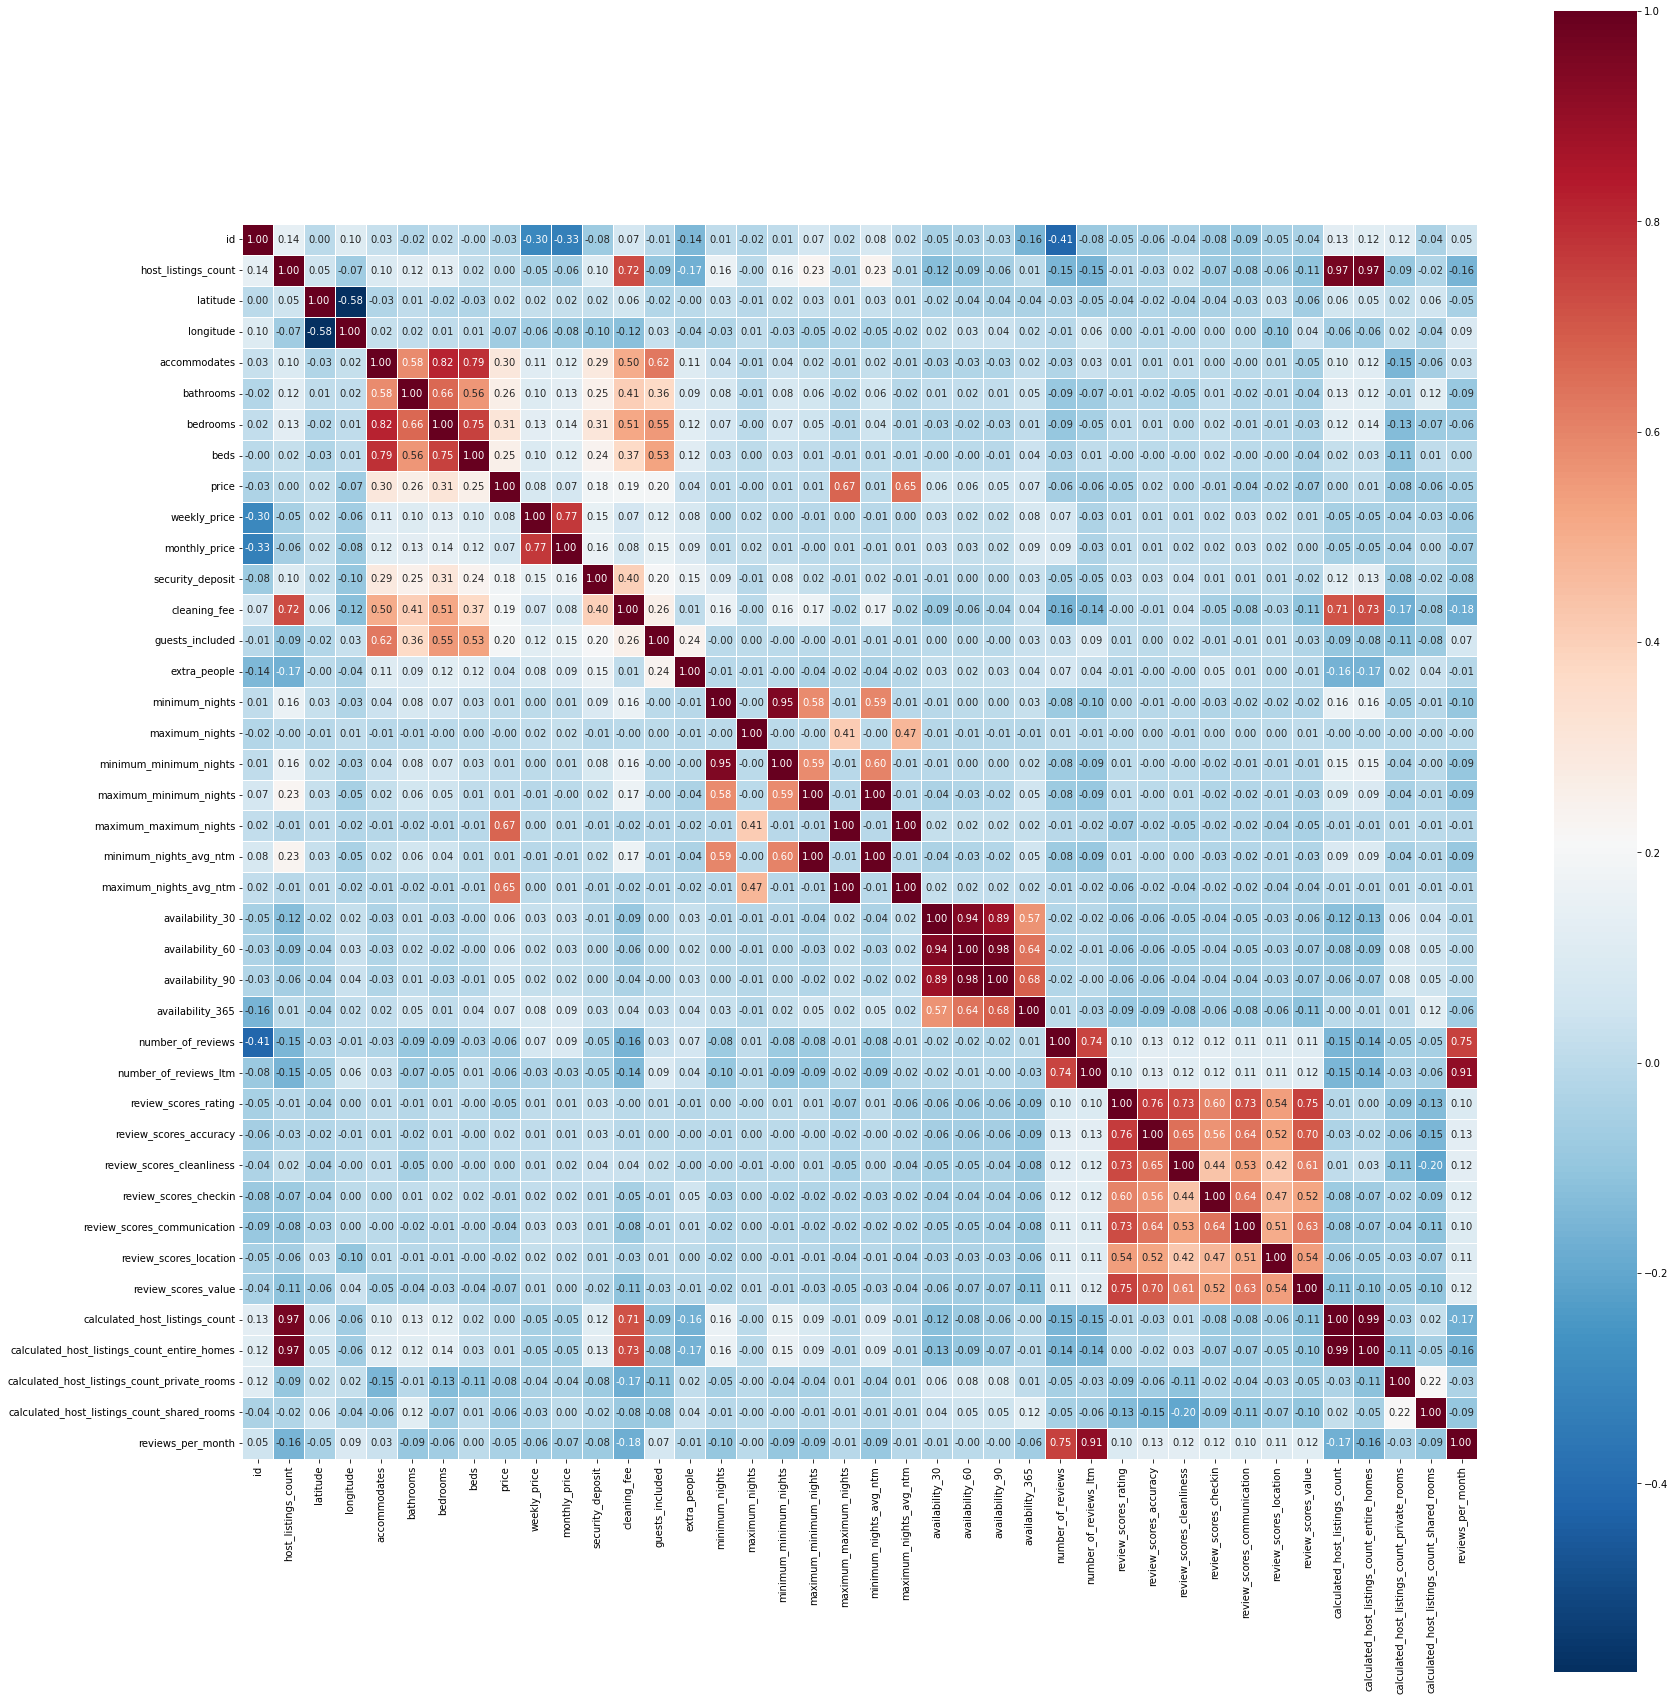

In [78]:
_, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(df_corr,
            square=True,
            cmap='RdBu_r',
            linewidths=.5,
            annot=True,
            fmt='.2f',ax=ax).figure.tight_layout()

plt.show()


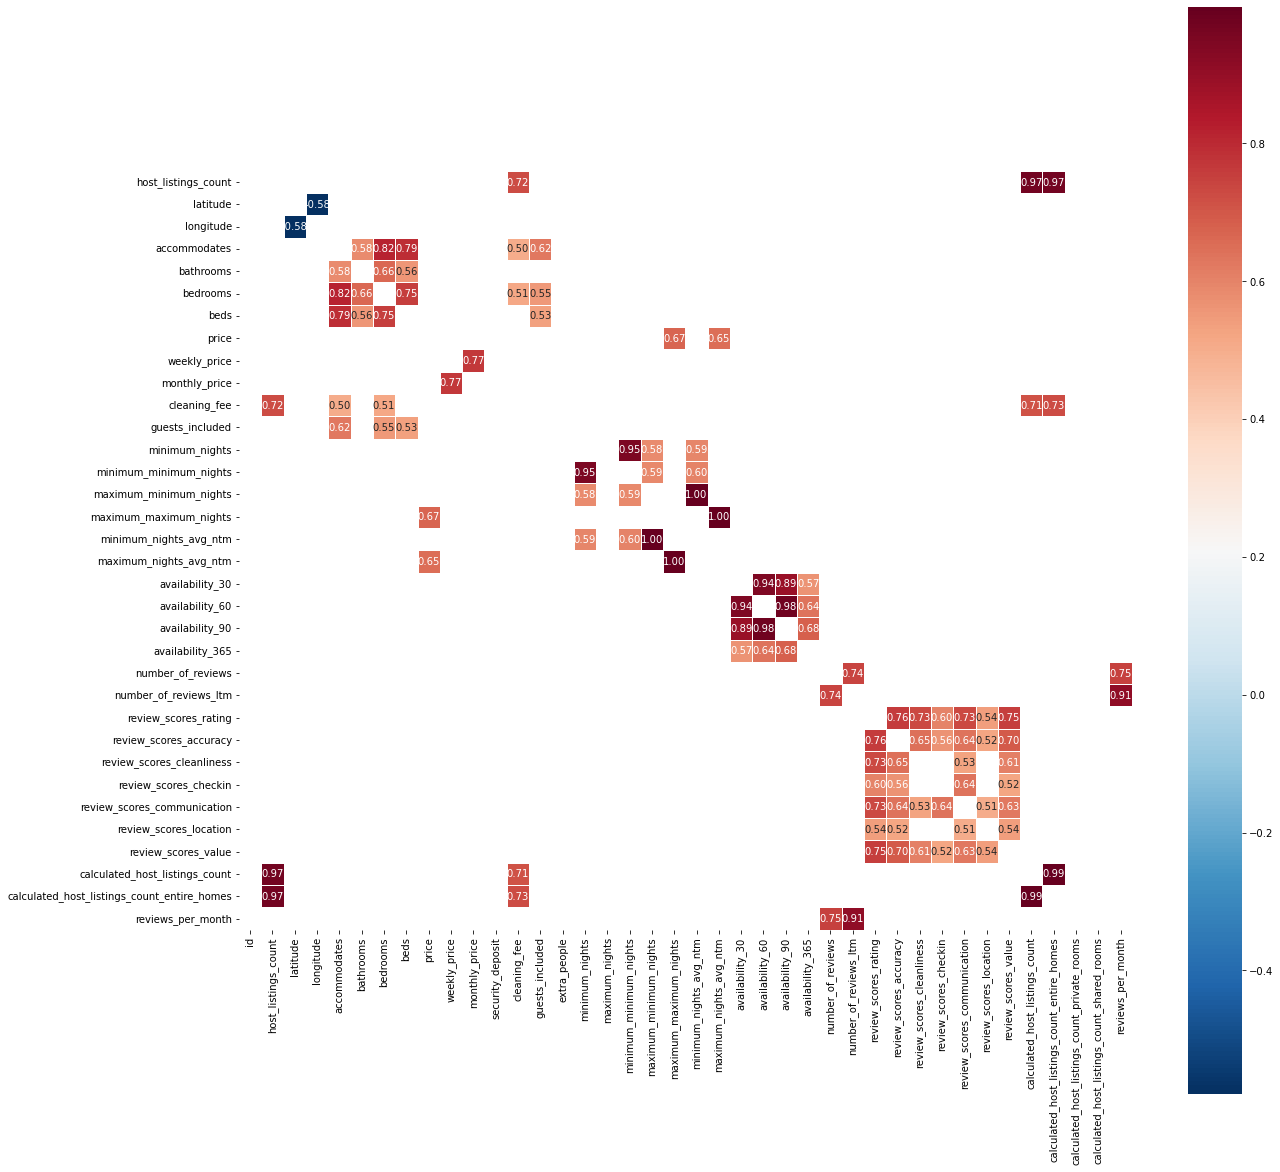

In [79]:
# filter the correlation matrix with threshold

filtered_df = df_corr[((df_corr >= .5) | (df_corr <= -.5)) & (df_corr !=1)].dropna(how="all")

_, ax = plt.subplots(figsize = (20,20))

sns.heatmap(filtered_df,
            square=True,
            cmap='RdBu_r',
            linewidths=.5,
            annot=True,
            fmt='.2f',
            ax=ax)

plt.show()

In [80]:
reviews_list = ['review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]
reviews_df = df_corr[reviews_list].loc[reviews_list]

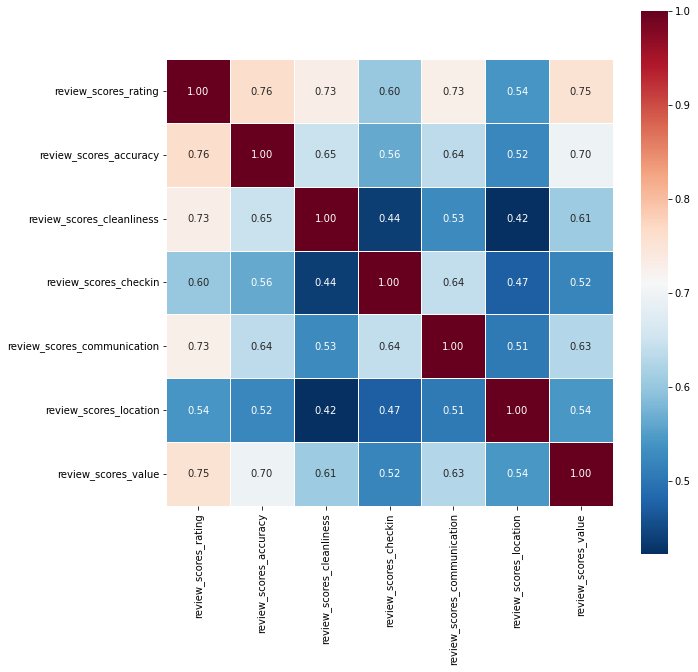

In [81]:
_, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(reviews_df,
            square=True,
            cmap='RdBu_r',
            linewidths=.5,
            annot=True,
            fmt='.2f',
            ax=ax)

plt.show()

In [82]:
# c = df_corr.abs()
s = df_corr.unstack()
so = s.sort_values(kind="quicksort").drop_duplicates()

In [83]:
so_df = pd.DataFrame(so[so >= .5])
so_df

,,0
cleaning_fee,accommodates,0.501138
review_scores_communication,review_scores_location,0.505076
bedrooms,cleaning_fee,0.513461
review_scores_checkin,review_scores_value,0.520450
review_scores_accuracy,review_scores_location,0.522244
review_scores_communication,review_scores_cleanliness,0.525856
guests_included,beds,0.530492
review_scores_location,review_scores_rating,0.539931
review_scores_value,review_scores_location,0.541977
guests_included,bedrooms,0.550557


## Fusion with reviews


In [84]:
reviews = pd.read_csv('./data/reviews.csv')
print(reviews.shape)
reviews.head()

(212513, 2)


,listing_id,date
0,4952,2009-08-02
1,4952,2009-09-04
2,4952,2009-10-16
3,4952,2009-12-10
4,4952,2010-06-08


In [85]:
rev_row = reviews['listing_id'].unique()

In [86]:
data_rev = data.loc[data['id'].isin(rev_row)]
data_rev.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,"Located in Professorville, Palo Alto, one of t...","Housekeeping every Monday, leave your door ope...",Walking distance to Stanford University (30 mi...,"Kitchen, laundry, family/TV room, garden, free...","Welcome and Orientation. Shared kitchen, garde...",No shoes in the house beyond the hall or laund...,Mei Lin,2009-01-24,"Palo Alto, California, United States","I have lived and worked in Asia, Europe, Austr...",t,Palo Alto,5.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Palo Alto, CA, United States",Palo Alto,Palo Alto,Palo Alto,"Palo Alto, CA",37.43972,-122.15672,t,Villa,Private room,2,2.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,Heating,W...",90.0,440.0,1428.0,0.0,35.0,1,45.0,2,365,2,2,365,2.0,365.0,2 months ago,0,0,0,0,75,0,2009-08-02,2019-01-12,96.0,10.0,10.0,10.0,10.0,10.0,10.0,"{""PALO ALTO""}",f,moderate,f,5,0,5,0,0.57
1,11464,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,10 min. to Lucky's and Starbucks at El Camino ...,Pet Policy: - Well Behaved pet up to 25 lb. of...,Public transportation at Homestead and Pomeroy...,Complimentary Wifi-internet + Basic Cable,Available any time for support and problem res...,Can house a couple- bed type is a full size be...,Emey,2009-09-30,"Mountain View, California, United States",I pride myself on attention to details and cus...,f,Santa Clara,13.0,"['email', 'phone', 'reviews']",t,f,"Santa Clara, CA, United States",Santa Clara,Santa Clara,Santa Clara,"Santa Clara, CA",37.34342,-121.98829,t,Apartment,Entire home/apt,1,1.0,NaN,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",85.0,0.0,2100.0,700.0,250.0,1,10.0,14,365,14,14,365,14.0,365.0,5 months ago,30,60,90,179,6,1,2014-06-15,2019-10-11,87.0,10.0,10.0,10.0,9.0,9.0,9.0,"{""SANTA CLARA""}",f,moderate,t,12,12,0,0,0.08
2,17884,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...","This is a very quiet family neighborhood, but ...","I cannot accommodate cats, sorry. I can usuall...","The CalTrain station is in walking distance, a...",Private outdoor patio. Shared washer/dryer on ...,I am usually in town. Guests have a private e...,"This is a quiet neighborhood, and the suite sh...",Janet,2010-01-08,"Lynn Haven, Florida, United States","I am a software engineer, recently retired fro...",f,Palo Alto,2.0,"['e

In [87]:
data_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5734 entries, 0 to 7214
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5734 non-null   int64  
 1   name                                          5734 non-null   object 
 2   summary                                       5563 non-null   object 
 3   space                                         4571 non-null   object 
 4   description                                   5606 non-null   object 
 5   neighborhood_overview                         3884 non-null   object 
 6   notes                                         3191 non-null   object 
 7   transit                                       3618 non-null   object 
 8   access                                        3642 non-null   object 
 9   interaction                                   3640 non-null   o

In [88]:
data_rev.describe(include='all')

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.734000e+03,5734,5563,4571,5606,3884,3191,3618,3642,3640,4196,5733,5733,5721,4050,5733,4859,5733.000000,5734,5733,5733,5734,5365,5734,5733,5734,5734.000000,5734.000000,5734,5734,5734,5734.000000,5734.000000,5729.000000,5707.000000,5734,5734,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5.734000e+03,5734.000000,5734.000000,5.734000e+03,5734.000000,5.734000e+03,5734,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5734.000000,5707,5707,5651.000000,5649.000000,5649.000000,5648.000000,5649.000000,5648.000000,5648.000000,5006,5734,5734,5734,5734.00000,5734.000000,5734.000000,5734.000000,5707.000000
unique,NaN,5615,4920,3791,5224,3066,2479,2834,3047,2780,3231,1812,1864,181,1791,2,114,NaN,222,2,2,32,36,16,26,32,NaN,NaN,2,27,4,NaN,NaN,NaN,NaN,5,5247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN,NaN,NaN,NaN,NaN,1909,787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,2,4,2,NaN,NaN,NaN,NaN,NaN
top,NaN,TRIBE ❤️ Deep Cleaned 2BR @ Great Mall Milpitas,The HackerHome Network New to the Valley? Tran...,"At Zeus, we focus exclusively on 30 day+ stays...","Dorm-style house in Silicon Valley. No-host, 5...",*Area Highlights* -Located in the Heart of the...,Parking is not included with your stay. Parkin...,This Flat Location is Uber/Lyft Accessible & C...,"• All utilities are included, including gas, e...",We're available 24/7 via Text | Email | Emerge...,By reserving your stay with Tribe you hereby a...,Zeus,2015-11-02,"San Jose, California, United States",Zeus is reinventing corporate housing. We do t...,t,Santa Clara,NaN,"['email', 'phone', 'reviews', 'kba']",t,f,"San Jose, CA, United States",Palo Alto,San Jose,San Jose,"San Jose, CA",NaN,NaN,t,House,Private room,NaN,NaN,NaN,NaN,Real Bed,"{Wifi,Kitchen,""Free parking on premises"",Break...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 months ago,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-10,2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""SAN JOSE""}",f,moderate,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,21,44,242,20,28,41,59,26,56,120,242,243,1648,242,2875,581,NaN,401,5730,3120,2431,666,2320,2434,2431,NaN,NaN,5414,3046,2781,NaN,NaN,NaN,NaN,5676,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1007,NaN,NaN,NaN,NaN,NaN,NaN,21,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2257,3262,2002,5547,NaN,NaN,NaN,NaN,NaN
mean,2.461825e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.008373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.352121,-121.966650,NaN,NaN,NaN,3.115452,1.371992,1.400768,1.816015,NaN,NaN,138.385246,87.096268,305.895361,254.594698,80.045692,1.741890,14.805023,8.277293,3.751977e+05,7.708580,9.726718,7.498746e+05,9.154220,6.880194e+05,NaN,13.247646,29.492675,47.013777,158.786188,36.

In [89]:
counts = reviews['listing_id'].value_counts()


In [90]:
counts.head()

7476637     489
52786       478
10814836    445
19641513    429
13828514    427
Name: listing_id, dtype: int64

## Fusion with neighborhood data


In [91]:
neighbors = pd.read_csv('./data/neighbourhoods.csv')
print(neighbors.shape)
neighbors.head()

(16, 2)


,neighbourhood_group,neighbourhood
0,NaN,Campbell
1,NaN,Cupertino
2,NaN,Gilroy
3,NaN,Los Altos
4,NaN,Los Altos Hills


In [92]:
data_neighbor = data['neighbourhood'].unique().tolist()
neighbors_hood = neighbors['neighbourhood'].unique().tolist()

In [93]:
same_locations = []

for neighbor in neighbors_hood:
    if neighbor in data_neighbor:
        same_locations.append(neighbor)

In [94]:
same_locations

['Campbell',
 'Cupertino',
 'Los Altos',
 'Los Altos Hills',
 'Mountain View',
 'Palo Alto',
 'Santa Clara',
 'Sunnyvale']

In [95]:
data_neighbor

['Palo Alto',
 'Santa Clara',
 'Mountain View',
 'South San Jose',
 'Cupertino',
 'Sunnyvale',
 'Downtown',
 'Campbell',
 'West Valley',
 'Edenvale',
 nan,
 'Willow Glen',
 'Central San Jose',
 'Los Altos',
 'Berryessa',
 'Cory',
 'College Park',
 'Alum Rock',
 'Cambrian/Pioneer',
 'North San Jose',
 'Los Altos Hills',
 'Burbank/Del Monte',
 'Evergreen',
 'Newhall/Sherwood',
 'Shasta/Hanchett Park',
 'Rose Garden',
 'Five Wounds/Brookwood Terrace',
 'Naglee Park',
 'Forest/Pruneridge',
 'Alviso',
 'Japantown',
 'Stanford',
 'Delmas Park',
 'Chapman/Morse',
 'Menlo Park',
 'Autumn/Montgomery',
 'Vermont/McKendrie']

In [96]:
neighbors_hood

['Campbell',
 'Cupertino',
 'Gilroy',
 'Los Altos',
 'Los Altos Hills',
 'Los Gatos',
 'Milpitas',
 'Monte Sereno',
 'Morgan Hill',
 'Mountain View',
 'Palo Alto',
 'San Jose',
 'Santa Clara',
 'Saratoga',
 'Sunnyvale',
 'Unincorporated Areas']

## ideas list

### methdology for this large scale data?

### which cols we need

- e.g.

  id
  name
  host_id
  host_name

  neighbourhood_group
  neighbourhood

  latitude
  longitude

  room_type

  price

  minimum_nights
  number_of_reviews

  reviews_per_month
  calculated_host_listings_count
  availability_365

### What to compare

- Room Type vs Price
- Price/log price Distribution Plot

### pipleline?

## Codes for refering

- [amenities refer](https://www.kaggle.com/brittabettendorf/predicting-prices-xgboost-feature-engineering)
- [word cloud /weighted words /sentimental analsys / topic modeling](https://www.kaggle.com/brittabettendorf/nlp-on-airbnb-data)

### nextweek

modeling for price prediction
